In [1]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split

# CIFAR-10 datasetini yükle
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Train dataseti %80, test dataseti %20 olarak ayır
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print(f"x_train shape: {x_train.shape}")
print(f"x_val shape: {x_val.shape}")
print(f"x_test shape: {x_test.shape}")


170498071/170498071 [==============================] - 2s 0us/step
x_train shape: (40000, 32, 32, 3)
x_val shape: (10000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


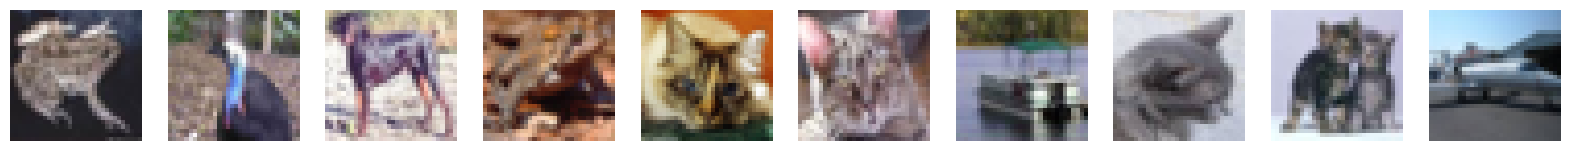

In [2]:
import matplotlib.pyplot as plt

# 10 tane görseli göster
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    axes[i].imshow(x_train[i])
    axes[i].axis('off')
plt.show()


In [3]:
# Verileri normalize etme
x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print(f"Normalized x_train shape: {x_train.shape}")
print(f"Normalized x_val shape: {x_val.shape}")
print(f"Normalized x_test shape: {x_test.shape}")


Normalized x_train shape: (40000, 32, 32, 3)
Normalized x_val shape: (10000, 32, 32, 3)
Normalized x_test shape: (10000, 32, 32, 3)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Etiketleri one-hot encode et
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

# CNN modeli oluştur
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Modeli derle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Modeli eğit
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))


Epoch 1/10
1250/1250 [==============================] - 57s 44ms/step - loss: 1.5333 - accuracy: 0.4477 - val_loss: 1.2618 - val_accuracy: 0.5562
Epoch 2/10
1250/1250 [==============================] - 54s 43ms/step - loss: 1.1668 - accuracy: 0.5885 - val_loss: 1.1212 - val_accuracy: 0.6081
Epoch 3/10
1250/1250 [==============================] - 53s 42ms/step - loss: 1.0289 - accuracy: 0.6417 - val_loss: 1.0277 - val_accuracy: 0.6414
Epoch 4/10
1250/1250 [==============================] - 54s 43ms/step - loss: 0.9383 - accuracy: 0.6744 - val_loss: 0.9841 - val_accuracy: 0.6606
Epoch 5/10
1250/1250 [==============================] - 54s 43ms/step - loss: 0.8662 - accuracy: 0.6985 - val_loss: 0.9820 - val_accuracy: 0.6627
Epoch 6/10
1250/1250 [==============================] - 54s 43ms/step - loss: 0.8088 - accuracy: 0.7171 - val_loss: 0.9769 - val_accuracy: 0.6661
Epoch 7/10
1250/1250 [==============================] - 54s 43ms/step - loss: 0.7584 - accuracy: 0.7342 - val_loss: 0.9695 -

In [5]:
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Test verisi ile tahmin yap
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Accuracy ve F1 score hesapla
accuracy = accuracy_score(y_true, y_pred_classes)
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

# Detaylı classification raporu
report = classification_report(y_true, y_pred_classes)
print(report)


313/313 [==============================] - 9s 28ms/step
Accuracy: 0.6823
F1 Score: 0.6789346189930411
              precision    recall  f1-score   support

           0       0.71      0.76      0.73      1000
           1       0.80      0.80      0.80      1000
           2       0.57      0.59      0.58      1000
           3       0.54      0.46      0.49      1000
           4       0.62      0.60      0.61      1000
           5       0.67      0.52      0.59      1000
           6       0.72      0.78      0.75      1000
           7       0.67      0.77      0.72      1000
           8       0.78      0.76      0.77      1000
           9       0.71      0.79      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000

